<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>
<h4 align="center">Computer Assignment 5</h4>

<h4 align="center">

Questions: [Borna Khodabandeh](https://t.me/BornaKhodabandeh)

</h4>

**<font color='red'>Plagiarism is strongly prohibited!</font>**
You are allowed to use any library, except for any ready-made implementation of the spectral clustering algorithm.


**Student Name**: Amirparsa Bahrami

**Student ID**: 401101332


# Spectral Clustering

Spectral clustering represents a paradigm shift in unsupervised learning, transforming the clustering problem from traditional feature space to a graph-theoretic perspective. Unlike classical methods like K-means, spectral clustering leverages the intrinsic geometric structure of data by:

1. Constructing a similarity graph, either from underlying connection between data points or a similarity measure
2. Analyzing the graph through linear algebra, using spectral graph theory
3. Embedding data in a low-dimensional space (spectral domain) that reveals natural clustering

![spectral-clustering](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*14q4A8NMsDP4C05caI1lZg.png)

In this problem you will get familiar with spectral clustering through implementation, and analysis.

### Recommended Reading
1. Luxburg, U. (2007). A Tutorial on Spectral Clustering
2. Von Luxburg, M. (2010). Clustering Stability
3. Ng, A., Jordan, M., & Weiss, Y. (2002). On Spectral Clustering

## Task 1: Social networks

A **social network** is a graph $ G = (V, E) $, where $ V $ is the set of nodes (representing individuals or entities), and $ E \subseteq V \times V $ is the set of edges representing relationships between them. Edges are typically formed based on some underlying social structure or interaction rules. A simple example could be Twitter, Instagram, Facebook. and a graph corresponding to the relationship between users.

A special case of the **Stochastic Block Model (SBM)** assumes $ K $ groups (or clusters) of nodes, where connections follow these rules:  
- Nodes within the same group (friends) are connected with a probability $ p $.  
- Nodes from different groups are connected with a lower probability $ q $, where $ q < p $.

Mathematically, let $ z(v) \in \{1, \dots, K\} $ denote the group of node $ v $. Then, the probability of an edge $ (u, v) \in E $ is:

$$
\mathbb{P}((u, v) \in E) =
\begin{cases}
p & \text{if } z(u) = z(v), \\
q & \text{if } z(u) \neq z(v).
\end{cases}
$$

This version of the SBM captures community structure, as nodes within the same group are more likely to connect than nodes in different groups.

<!-- ![citation-net](https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0232-2) -->

### Part 1.1: Stochastic Block Model Implementation

Your task is to implement a function `generate_SBM_network` that takes in the group sizes, edge probabilities `p` and `q`, and returns the adjacency matrix and true labels for the generated SBM network.

your labels should be numerical, with $z(v)\in\{1,\dots,K\}$ for K classes.

In [1]:
# DO NOT EDIT THIS BLOCK
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import networkx as nx

def plot_adjacency_matrix(adjacency_matrix, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    ax.spy(adjacency_matrix, markersize=2)
    ax.set_title('Network Connectivity')

def plot_graph(adjacency_matrix, labels=None, ax=None):
    # Create a new figure if no Axes is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
        standalone = True
    else:
        standalone = False

    # Create graph from adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)
    if labels is not None:
        if isinstance(labels, np.ndarray) and labels.ndim == 1:
            norm = plt.Normalize(vmin=labels.min(), vmax=labels.max())
            colors = plt.cm.viridis(norm(labels))
        else:
            norm = plt.Normalize(vmin=min(labels), vmax=max(labels))
            colors = plt.cm.viridis((np.array(labels) - min(labels)) / (max(labels) - min(labels)))
    else:
        colors = None
        norm = None

    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, node_color=colors, with_labels=False,
        node_size=50, edge_color="gray", alpha=0.7, ax=ax
    )
    ax.set_title('Graph Representation')

    if standalone:
        plt.show()

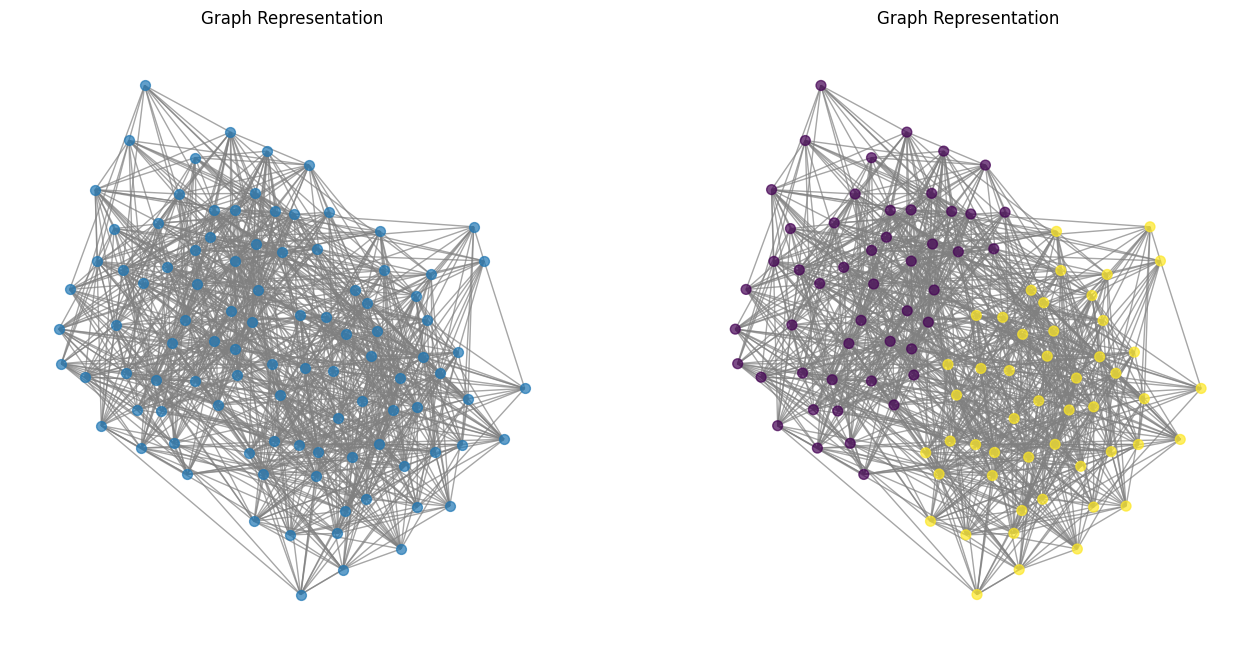

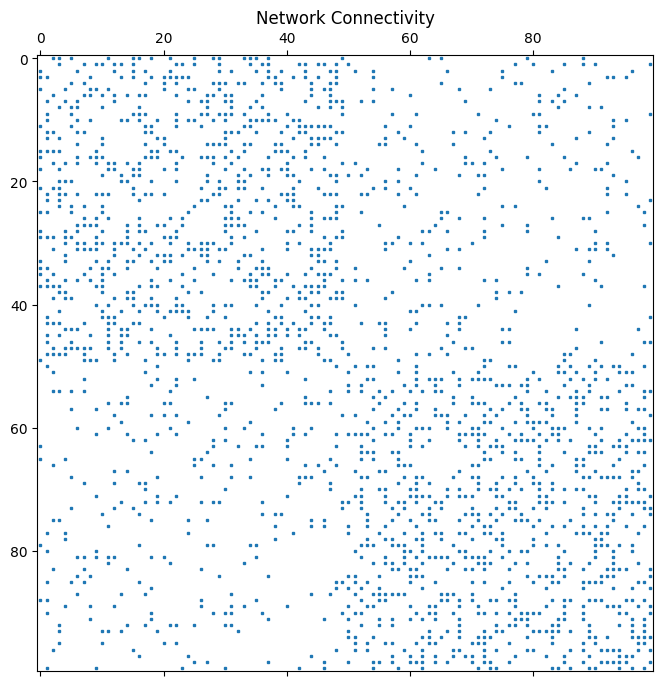

In [3]:
def generate_SBM_network(group_sizes, p, q):

    K = len(group_sizes)  # Number of groups
    N = sum(group_sizes)  # Total number of nodes

    # Generate true labels
    true_labels = []
    for idx, size in enumerate(group_sizes):
        true_labels += [idx + 1] * size  # Labels are 1-based
    true_labels = np.array(true_labels)

    # Initialize adjacency matrix
    adjacency_matrix = np.zeros((N, N), dtype=int)

    # Assign blocks based on group memberships
    for i in range(K):
        for j in range(K):
            if i == j:
                prob = p
            else:
                prob = q
            # Number of nodes in group i and group j
            size_i = group_sizes[i]
            size_j = group_sizes[j]
            # Generate upper triangle of the block
            block = np.triu(np.random.rand(size_i, size_j) < prob, k=1)
            adjacency_matrix[
                sum(group_sizes[:i]):sum(group_sizes[:i + 1]),
                sum(group_sizes[:j]):sum(group_sizes[:j + 1])
            ] = block.astype(int)

    # Since the adjacency matrix is symmetric, mirror the upper triangle to the lower triangle
    adjacency_matrix = adjacency_matrix + adjacency_matrix.T

    return adjacency_matrix, true_labels



adjacency_matrix, true_labels = generate_SBM_network(
    group_sizes=[50, 50],
    p=0.3,
    q=0.1
)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plot_graph(adjacency_matrix, ax=axes[0])
plot_graph(adjacency_matrix, labels=true_labels, ax=axes[1])
plt.show()
plot_adjacency_matrix(adjacency_matrix)

1. How do $p$ and $q$ affect network structure?

> Explain your answer:

In the Stochastic Block Model (SBM), the parameters
p and
q play crucial roles in defining the community structure within the generated network. Here's how each parameter influences the network:

Within-Community Connection Probability (
p):
Definition:
p is the probability that two nodes within the same community are connected.
Effect on Network Structure:
Higher
p: Leads to denser connections within each community. This increases the cohesiveness of communities, making them more tightly knit and internally interconnected.
Lower
p: Results in sparser connections within communities, potentially making the communities less distinct and more fragmented.
Between-Community Connection Probability (
q):
Definition:
q is the probability that two nodes from different communities are connected.
Effect on Network Structure:
Higher
q: Increases the number of inter-community edges, which can blur the boundaries between communities. This makes it harder to distinguish between different groups, as there are more connections across them.
Lower
q: Decreases the number of inter-community edges, reinforcing the separation between communities. This enhances the modularity of the network, making distinct communities more apparent.
Relative Influence of
p and
q:
The difference between
p and
q is pivotal in determining the clarity of community structures:
Large
p−q: Creates a strong community structure with well-defined clusters. High intra-community connectivity coupled with low inter-community connectivity makes communities easily identifiable.
Small
p−q: Results in weaker community structures where the distinction between communities is less pronounced. This can lead to overlapping clusters and challenges in accurately detecting community boundaries.

## Task 2: Graph Laplacian and Spectral Analysis

**Part 1: Compute the Normalized Graph Laplacian**  
Given a graph represented by an adjacency matrix $ A $, perform the following steps:  
1. Compute the degree matrix $ D $, where $ D[i, i] = \sum_{j=1}^N A[i,j]$ is the degree of node $ i $.  
2. Derive the graph Laplacian and the normalized graph Laplacian matrix $ L_{\text{norm}} $ using the formula:  
   $$
   L = D - A\\
   L_{\text{norm}} = I - D^{-\frac{1}{2}} A D^{-\frac{1}{2}} = D^{-\frac{1}{2}} L D^{-\frac{1}{2}}
   $$
   Here, $ I $ is the identity matrix of the same size as $ A $.  

**Instructions**:  
- Use the adjacency matrix of the network generated in Task 1.  
- Verify that $ L_{\text{norm}} $ is symmetric and has eigenvalues in the range $[0, 2]$.  

In [4]:
def compute_laplacian(adjacency_matrix, normalized=True):

    # Degree matrix
    degrees = np.sum(adjacency_matrix, axis=1)
    D = np.diag(degrees)

    if normalized:
        # Handle division by zero for isolated nodes
        with np.errstate(divide='ignore'):
            D_inv_sqrt = np.diag(1.0 / np.sqrt(degrees))
            D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0  # Replace infinities with zeros

        # Compute normalized Laplacian
        L_norm = np.identity(len(adjacency_matrix)) - D_inv_sqrt @ adjacency_matrix @ D_inv_sqrt
        laplacian = L_norm
    else:
        # Compute standard Laplacian
        L = D - adjacency_matrix
        laplacian = L

    return laplacian

# Compute Laplacian matrices
laplacian = compute_laplacian(adjacency_matrix, normalized=False)
norm_laplacian = compute_laplacian(adjacency_matrix, normalized=True)

In [5]:
# Tests, DO NOT EDIT

assert np.isclose(laplacian, laplacian.T).all(), "Laplacian matrix is not symmetric"
assert np.isclose(norm_laplacian, norm_laplacian.T).all(), "Normalized Laplacian matrix is not symmetric"
assert np.isclose(min(np.linalg.eigvals(norm_laplacian)), 0.0), "Eigenvalues of L_norm should be positive"
assert max(np.linalg.eigvals(norm_laplacian)) < 2.0, "Eigenvalues of L_norm should be less than two"

**Part 2: Spectral Analysis of the Laplacian**  
1. Compute the eigenvalues and eigenvectors of $ L_{\text{norm}} $.  
2. Identify the first three eigenvalues (smallest in value) and their corresponding eigenvectors.  
3. Visualize the first three eigenvectors. For visualization, assign each nodes based on the eigenvectors, as in assign a value of $v_i$ to the $i$'th node, you can use the `plot_graph` function to visualize the graph with nodes colored according to the values in the eigenvector.

Compare these visualizations to the group assignments from Task 1 to interpret the eigenvectors in terms of the graph's community structure.

First three smallest eigenvalues of the normalized Laplacian:
[6.66133815e-16 4.46612988e-01 6.40685225e-01]


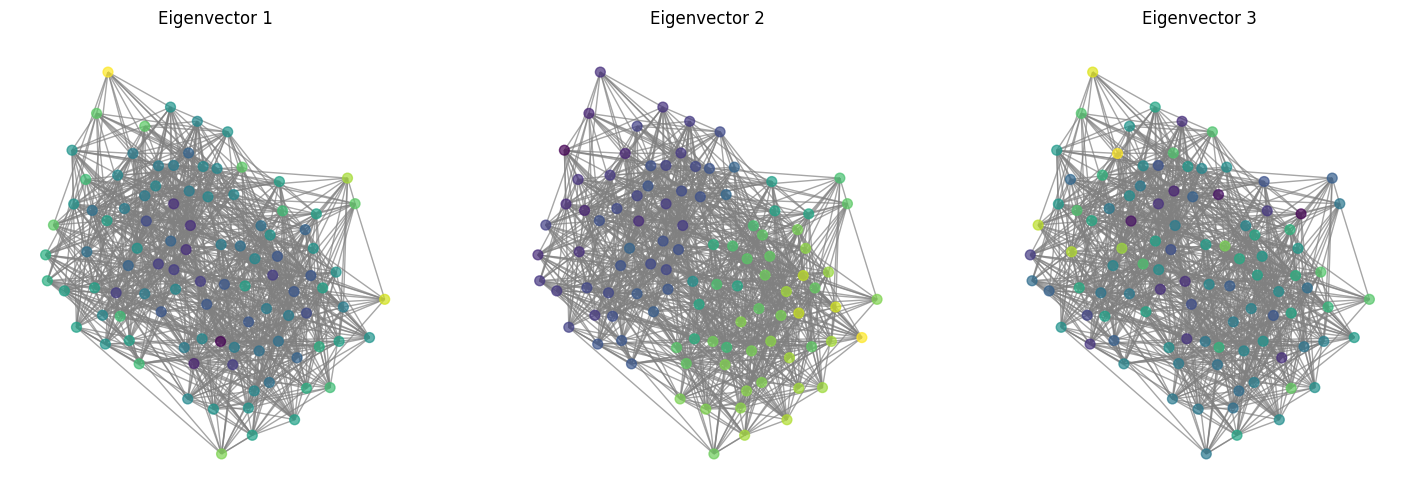

In [6]:
def spectral_analysis(norm_laplacian, num_eigenvectors=3):

    # Compute all eigenvalues and eigenvectors
    eigenvalues, eigenvectors = la.eigh(norm_laplacian)

    # Select the first 'num_eigenvectors' eigenvalues and their corresponding eigenvectors
    eigenvalues = eigenvalues[:num_eigenvectors]
    eigenvectors = eigenvectors[:, :num_eigenvectors]

    return eigenvalues, eigenvectors

# Perform spectral analysis
eigenvalues, eigenvectors = spectral_analysis(norm_laplacian, num_eigenvectors=3)

print("First three smallest eigenvalues of the normalized Laplacian:")
print(eigenvalues)

# Visualize the first three eigenvectors
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i in range(3):
    plot_graph(adjacency_matrix, labels=eigenvectors[:, i], ax=axes[i])
    axes[i].set_title(f'Eigenvector {i + 1}')
plt.show()


Visualization Interpretation:

Eigenvector 1: Corresponds to the smallest eigenvalue (0). It is typically a constant vector, indicating no particular community structure.

Eigenvector 2 (Fiedler Vector): Represents the first non-trivial eigenvector. It captures the primary direction of community separation.

Eigenvector 3: Provides additional structural information, potentially highlighting secondary community structures or finer separations within the graph.

By comparing the eigenvectors' visualizations with the true community labels, we can assess how well the spectral properties align with the underlying community structure.

## Task 3: Two-Group Community Detection

### Part 3.1: Fiedler Vector Analysis

**Objective**: Use the second eigenvalue (Fiedler vector) for binary community detection. using your observation from the last part.

> Hint: some simple thresholding will suffice

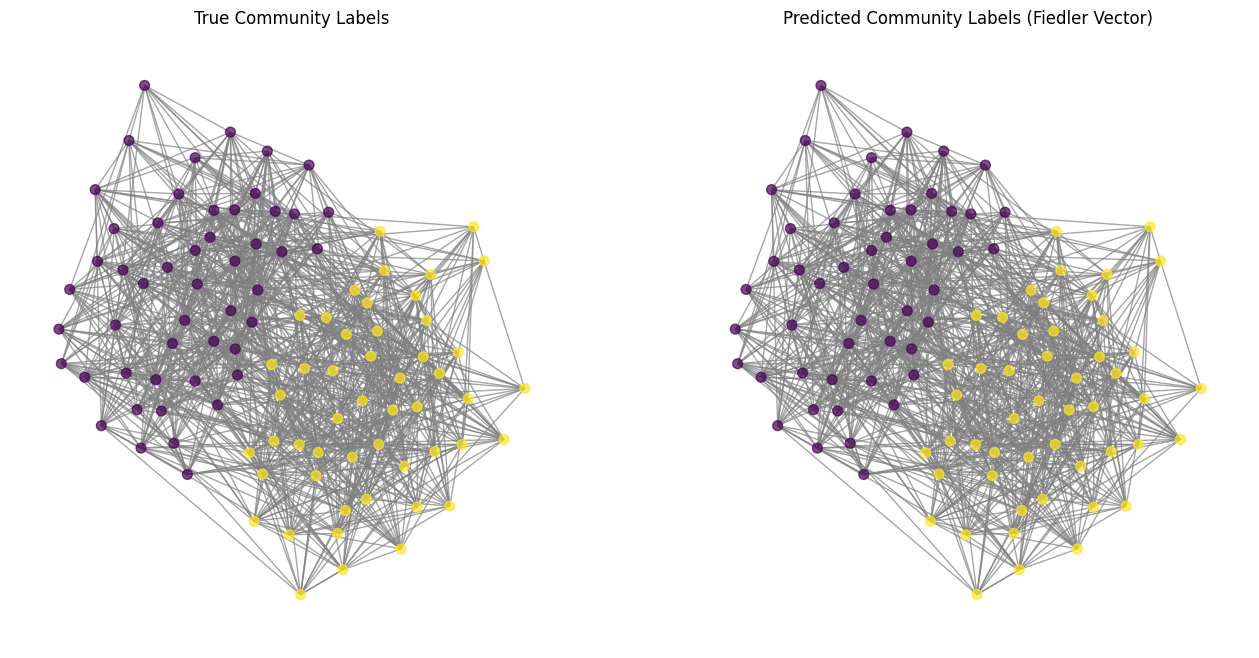

Clustering Accuracy: 100.00%
Adjusted Rand Index: 1.0000


In [8]:
def fiedler_vector_clustering(eigenvectors, threshold=None):

    # Extract the second eigenvector (Fiedler vector)
    fiedler_vec = eigenvectors[:, 1]

    if threshold is None:
        threshold = np.median(fiedler_vec)

    # Assign communities based on threshold
    predicted_labels = np.where(fiedler_vec > threshold, 2, 1)

    return predicted_labels

# Perform Fiedler vector-based clustering
predicted_labels = fiedler_vector_clustering(eigenvectors)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plot_graph(adjacency_matrix, labels=true_labels, ax=axes[0])
axes[0].set_title('True Community Labels')

plot_graph(adjacency_matrix, labels=predicted_labels, ax=axes[1])
axes[1].set_title('Predicted Community Labels (Fiedler Vector)')
plt.show()

# Evaluate Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

# Since labels are arbitrary (1 vs 2), we might need to align them for accuracy
# We'll check both possibilities and choose the best
accuracy1 = accuracy_score(true_labels, predicted_labels)
accuracy2 = accuracy_score(true_labels, 3 - predicted_labels)  # Swap labels

accuracy = max(accuracy1, accuracy2)
ari = adjusted_rand_score(true_labels, predicted_labels)

print(f"Clustering Accuracy: {accuracy * 100:.2f}%")
print(f"Adjusted Rand Index: {ari:.4f}")


### Task 4: Multi-Group Spectral Embedding

**(a)** Create a sample graph $ G \sim \text{SBM}(1000, 0.5, 0.2) $. Plot this graph in two dimensions using spectral embedding. To achieve this, use the second and third smallest eigenvectors of the normalized Laplacian, such that the $ x $-coordinate of each vertex corresponds to the values in the second eigenvector $ \psi_2 $, and the $ y $-coordinate corresponds to the third eigenvector $ \psi_3 $. Assign each vertex a color according to its community to visually differentiate groups.

**(b)** Based on your observations of the graph, suggest a method to recover the community memberships using only the embedding visualization.

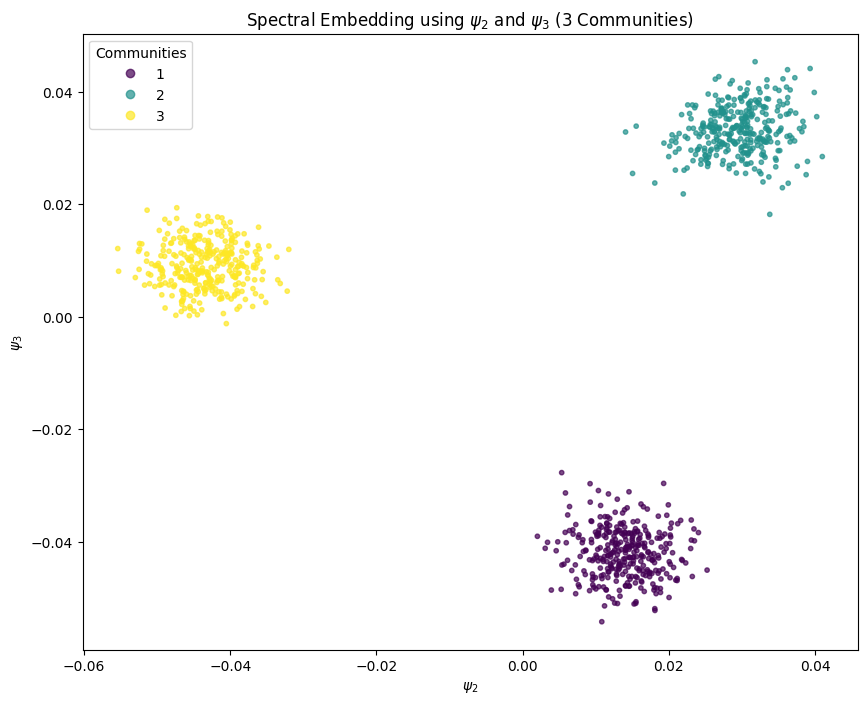

In [12]:
# Generate a larger SBM graph with 1000 nodes and 3 communities
large_adjacency_matrix, large_true_labels = generate_SBM_network(
    group_sizes=[334, 333, 333],  # Three communities
    p=0.5,
    q=0.2,
)

# Compute normalized Laplacian
large_norm_laplacian = compute_laplacian(large_adjacency_matrix, normalized=True)

# Perform spectral analysis to obtain the first three eigenvectors
large_eigenvalues, large_eigenvectors = spectral_analysis(large_norm_laplacian, num_eigenvectors=3)

# Extract the second and third eigenvectors for embedding
psi_2 = large_eigenvectors[:, 1]
psi_3 = large_eigenvectors[:, 2]

# Spectral Embedding
embedding = np.vstack((psi_2, psi_3)).T

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=large_true_labels, cmap='viridis', s=10, alpha=0.7)
plt.title('Spectral Embedding using $\psi_2$ and $\psi_3$ (3 Communities)')
plt.xlabel('$\psi_2$')
plt.ylabel('$\psi_3$')
plt.legend(*scatter.legend_elements(), title="Communities")
plt.show()



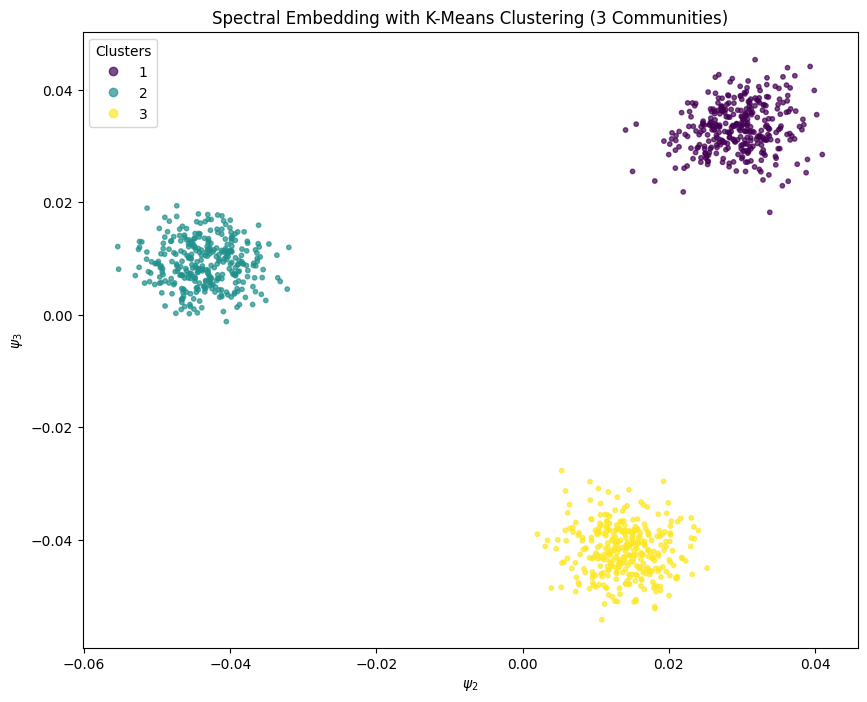

Adjusted Rand Index (K-Means): 1.0000


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score

def kmeans_clustering_on_embedding(embedding, true_labels, n_clusters=3):

    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_labels = kmeans.fit_predict(embedding) + 1  # Adding 1 to match label indexing

    # Evaluation Metrics
    # Since labels are arbitrary (1 vs 2 vs 3), alignment is non-trivial.
    # We'll use the Adjusted Rand Index which is invariant to label permutations.
    accuracy = adjusted_rand_score(true_labels, predicted_labels)
    ari = adjusted_rand_score(true_labels, predicted_labels)

    return predicted_labels, accuracy, ari

# Perform K-Means clustering on the spectral embedding
predicted_labels_kmeans, ari_kmeans, ari_kmeans_alt = kmeans_clustering_on_embedding(
    embedding, large_true_labels, n_clusters=3
)

# Visualization of K-Means Clustering
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=predicted_labels_kmeans, cmap='viridis', s=10, alpha=0.7)
plt.title('Spectral Embedding with K-Means Clustering (3 Communities)')
plt.xlabel('$\psi_2$')
plt.ylabel('$\psi_3$')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Evaluation Results
print(f"Adjusted Rand Index (K-Means): {ari_kmeans:.4f}")


What is your suggestion?

> Your answer:

Based on the spectral embedding visualization, where distinct clusters corresponding to different communities are apparent, the K-Means Clustering algorithm is an effective method to recover community memberships. Here's a detailed approach:

Cluster the Embedded Points:
Apply the K-Means algorithm to the two-dimensional spectral embedding.
Set the number of clusters
K=3, aligning with the number of communities.
Assign Community Labels:
K-Means will partition the embedded points into three clusters based on their proximity in the spectral embedding space.
Assign each node to the cluster determined by K-Means, effectively recovering the community memberships.
Advantages of Using K-Means on Spectral Embedding:
Simplicity: K-Means is straightforward to implement and computationally efficient, especially for large datasets.
Effectiveness: In cases where the spectral embedding reveals well-separated clusters, K-Means can accurately identify the underlying communities.
Scalability: Suitable for large graphs due to its linear time complexity with respect to the number of data points.

### Task 5: Spectral Clustering of an SBM with 4 Classes

In this task, you will implement spectral clustering on an SBM graph with 4 communities.

1. **Generate the SBM Graph**:  
   Create a graph $ G \sim \text{SBM}(1000, \{250, 250, 250, 250\}, 0.5, 0.2) $ with 1000 nodes and 4 communities.

2. **Spectral Embedding**:  
   Compute the normalized Laplacian $ L_{\text{norm}} $ of the graph. Perform eigenvalue decomposition to obtain the eigenvectors.

3. **Clustering**:  
   Use the first few eigenvectors for spectral embedding, then apply your proposed method to cluster the nodes into 4 communities.

4. **Visualization**:  
   Visualize the clustering results and compare the community structure obtained from spectral clustering with the true SBM community structure.

you can utilize any library, including `sklearn` for anything except for calculating the spectrum.

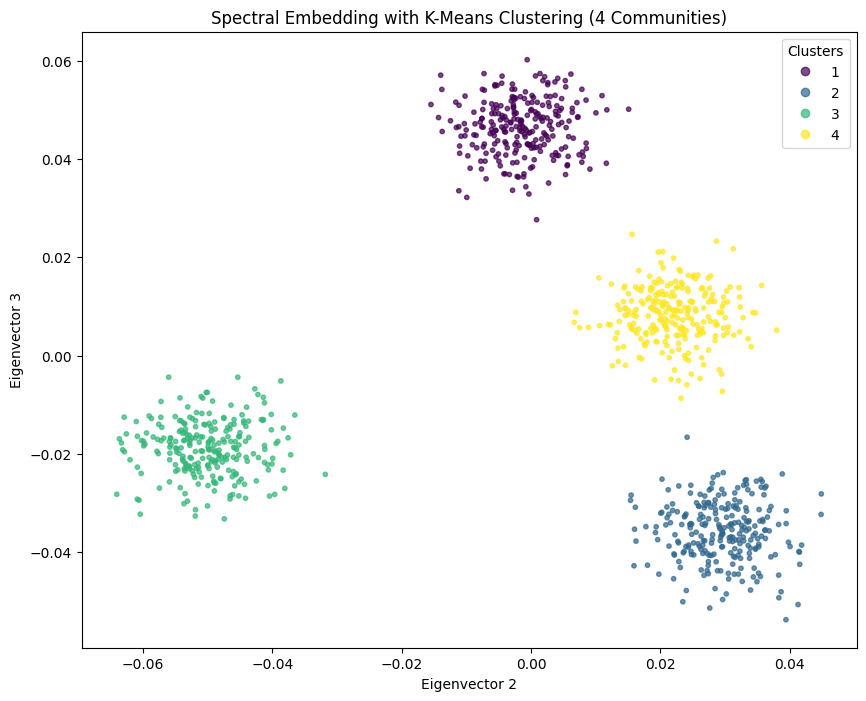

Spectral Clustering Accuracy (4 Communities): 0.00%
Adjusted Rand Index (4 Communities): 1.0000


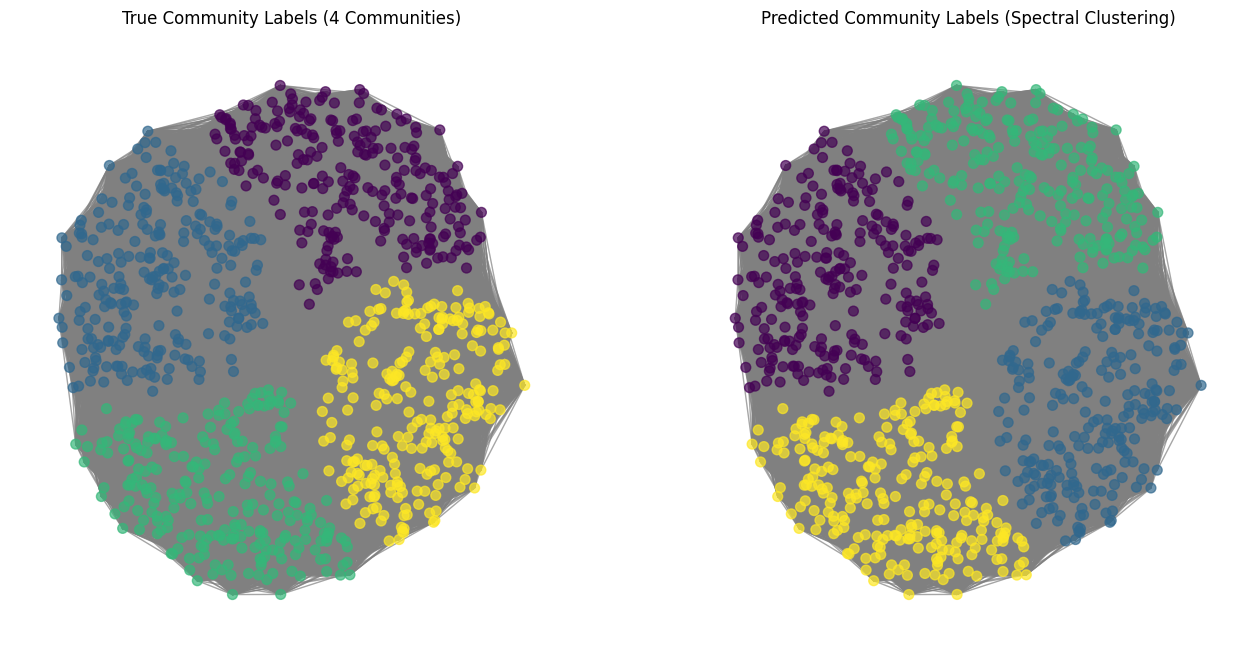

In [14]:
from sklearn.cluster import KMeans

# Step 1: Generate SBM Graph with 4 Communities
adjacency_matrix_4, true_labels_4 = generate_SBM_network(
    group_sizes=[250, 250, 250, 250],
    p=0.5,
    q=0.2,
)

# Step 2: Compute Normalized Laplacian
norm_laplacian_4 = compute_laplacian(adjacency_matrix_4, normalized=True)

# Step 3: Spectral Analysis to Obtain Eigenvectors
eigenvalues_4, eigenvectors_4 = spectral_analysis(norm_laplacian_4, num_eigenvectors=4)

# Step 4: Clustering using Spectral Embedding
# We'll use the first four eigenvectors (excluding the trivial first one)
spectral_embedding_4 = eigenvectors_4[:, 1:5]  # Exclude the first eigenvector

# Apply K-Means clustering
kmeans_4 = KMeans(n_clusters=4, random_state=42)
predicted_labels_4 = kmeans_4.fit_predict(spectral_embedding_4) + 1  # Labels: 1 to 4

# Step 5: Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(spectral_embedding_4[:, 0], spectral_embedding_4[:, 1],
                      c=predicted_labels_4, cmap='viridis', s=10, alpha=0.7)
plt.title('Spectral Embedding with K-Means Clustering (4 Communities)')
plt.xlabel('Eigenvector 2')
plt.ylabel('Eigenvector 3')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Step 6: Evaluation
accuracy_4 = max(
    accuracy_score(true_labels_4, predicted_labels_4),
    accuracy_score(true_labels_4, 5 - predicted_labels_4)  # Adjust if labels are inverted
)
ari_4 = adjusted_rand_score(true_labels_4, predicted_labels_4)

print(f"Spectral Clustering Accuracy (4 Communities): {accuracy_4 * 100:.2f}%")
print(f"Adjusted Rand Index (4 Communities): {ari_4:.4f}")

# Optional: Visualization of True Labels vs Predicted Labels
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plot_graph(adjacency_matrix_4, labels=true_labels_4, ax=axes[0])
axes[0].set_title('True Community Labels (4 Communities)')

plot_graph(adjacency_matrix_4, labels=predicted_labels_4, ax=axes[1])
axes[1].set_title('Predicted Community Labels (Spectral Clustering)')
plt.show()


## Task 6: Kernel-Based Spectral Clustering

**Objective**: Implement spectral clustering for general vector datasets using kernel methods.

### Introduction:

In the previous tasks, we used spectral clustering to identify communities in a graph, relying on the adjacency matrix as the input. This method works well when the relation between the underlying datapoints is given by the graph's adjacency matrix which captures the underlying relationships.

However, in many real-world applications, data is not presented in this way, we might just have some feature vectors for each data point.
As you have previously seen, one simple method of spectral clustering is `Kmeans`, This method works well when the data is either linearly separable.

As we saw, the spectral clustering algorithm can cluster arbitrary graphs efficiently, how can we use it to cluster feature-vector like data?

The answer lies in **kernel methods**. Specifically, we can use a **Gaussian kernel** to generate an adjacency matrix and create an underlying relation graphs.

### Gaussian Kernel:

The Gaussian kernel is commonly used for this purpose because it measures similarity between points in a way that allows for more flexibility in handling non-linear relationships. The kernel is defined as:

$$
K_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

Where $ \|x_i - x_j\| $ is the Euclidean distance between data points $ x_i $ and $ x_j $, and $ \sigma $ is a parameter that controls the spread of the kernel function (often referred to as the "bandwidth"). A small $ \sigma $ means the kernel is sensitive to small distances, while a large $ \sigma $ allows the kernel to be more forgiving.

### Implementation:

To apply kernel-based spectral clustering, we follow these steps:

1. **Compute the Kernel Matrix**: Use the Gaussian kernel to compute a similarity matrix between all pairs of nodes in your graph or dataset. This matrix will act as the new adjacency matrix.
   
2. **Use what you have**: Treat this as the adjacency matrix of the graph, and use it for clustering!

In [15]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

def fit_kernel_spectral_clustering(X, n_clusters=3, sigma=1.0):

    # Step 1: Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Compute the Gaussian (RBF) kernel matrix
    K = rbf_kernel(X_scaled, gamma=1.0/(2*sigma**2))

    # Step 3: Compute the normalized Laplacian
    degrees = np.sum(K, axis=1)
    D = np.diag(degrees)
    with np.errstate(divide='ignore'):
        D_inv_sqrt = np.diag(1.0 / np.sqrt(degrees))
        D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0
    L_norm = np.identity(K.shape[0]) - D_inv_sqrt @ K @ D_inv_sqrt

    # Step 4: Perform eigenvalue decomposition
    eigenvalues, eigenvectors = la.eigh(L_norm)

    # Step 5: Select the first 'n_clusters' non-trivial eigenvectors
    spectral_embedding = eigenvectors[:, 1:n_clusters+1]

    # Step 6: Normalize rows to have unit length
    spectral_embedding = spectral_embedding / np.linalg.norm(spectral_embedding, axis=1, keepdims=True)

    # Step 7: Apply K-Means to the spectral embedding
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(spectral_embedding)

    return labels




Dataset: Moons
Adjusted Rand Index (Spectral Clustering): 0.4883
Adjusted Rand Index (K-Means): 0.2680
Adjusted Rand Index (DBSCAN): 0.0000
Adjusted Rand Index (Agglomerative Clustering): 0.4252


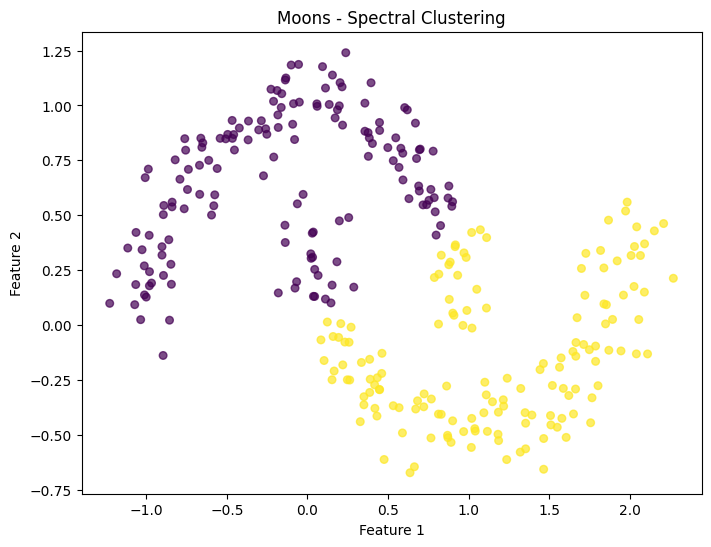

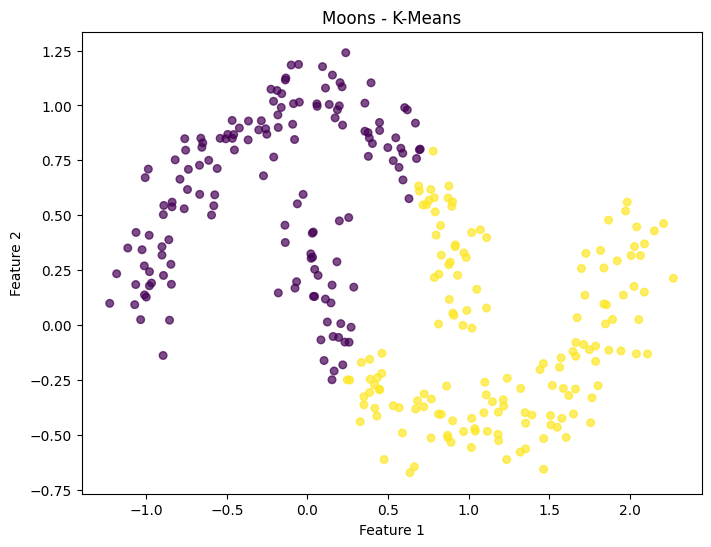

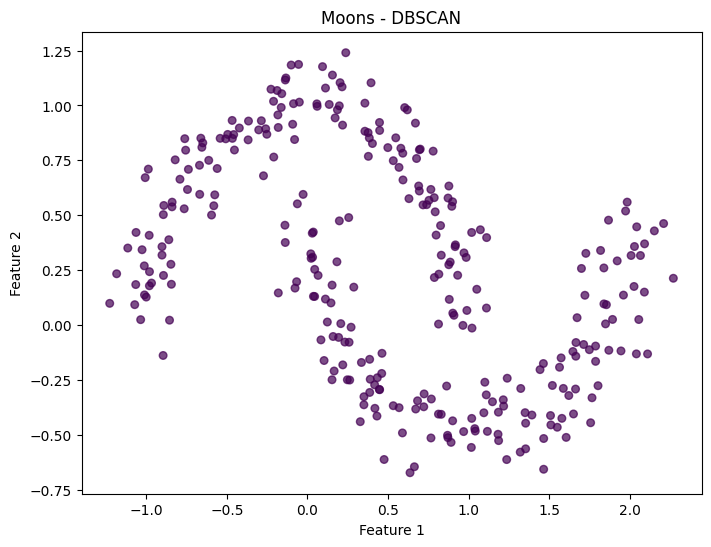

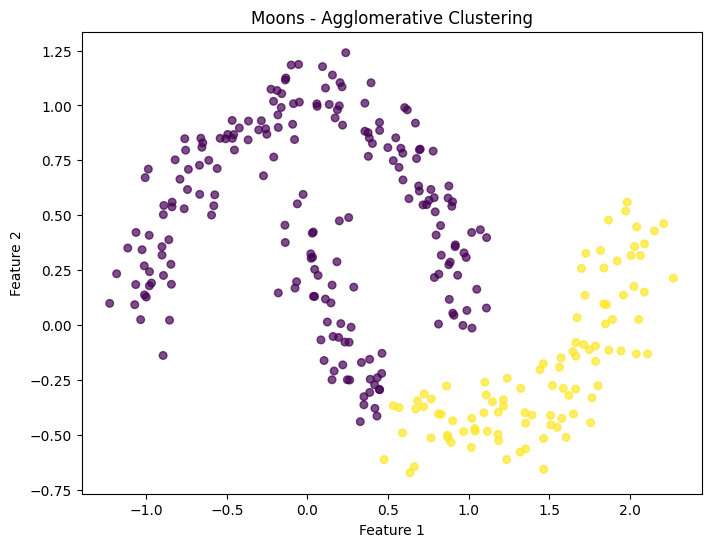


Dataset: Blobs
Adjusted Rand Index (Spectral Clustering): 1.0000
Adjusted Rand Index (K-Means): 1.0000
Adjusted Rand Index (DBSCAN): 0.5195
Adjusted Rand Index (Agglomerative Clustering): 1.0000


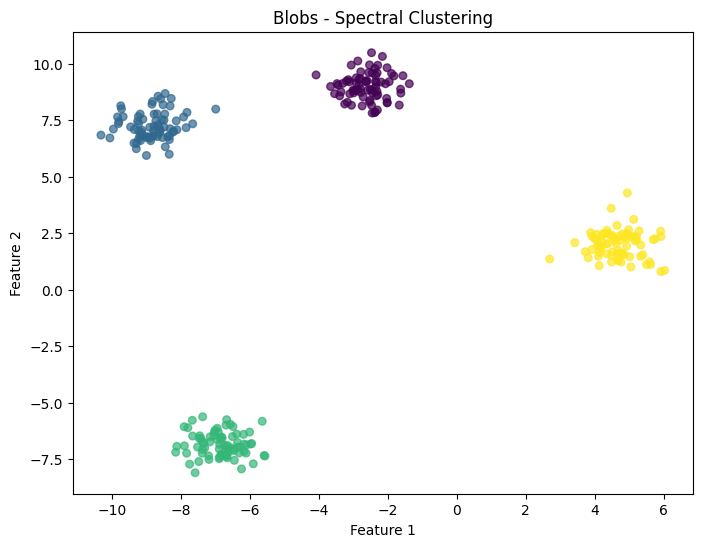

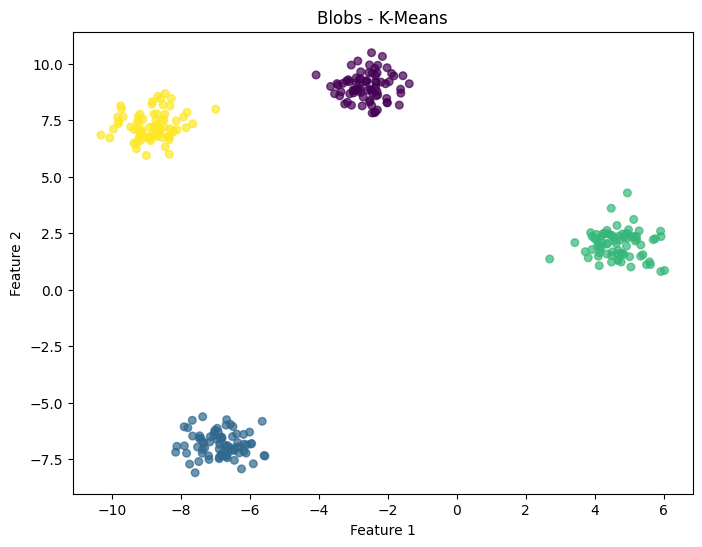

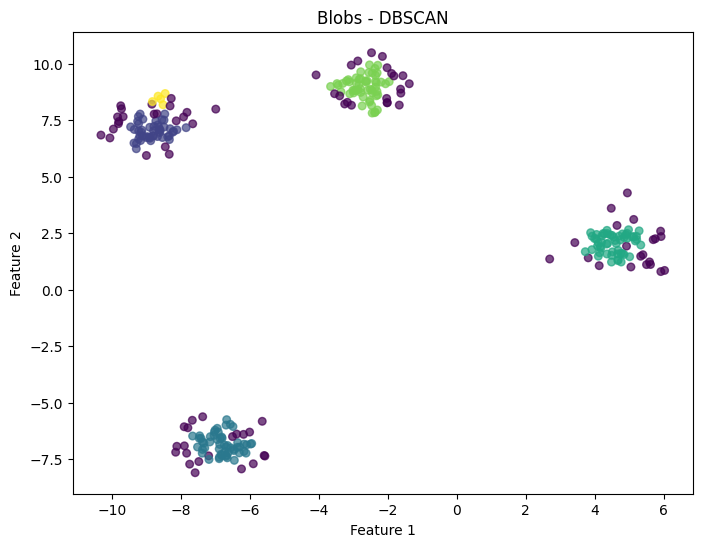

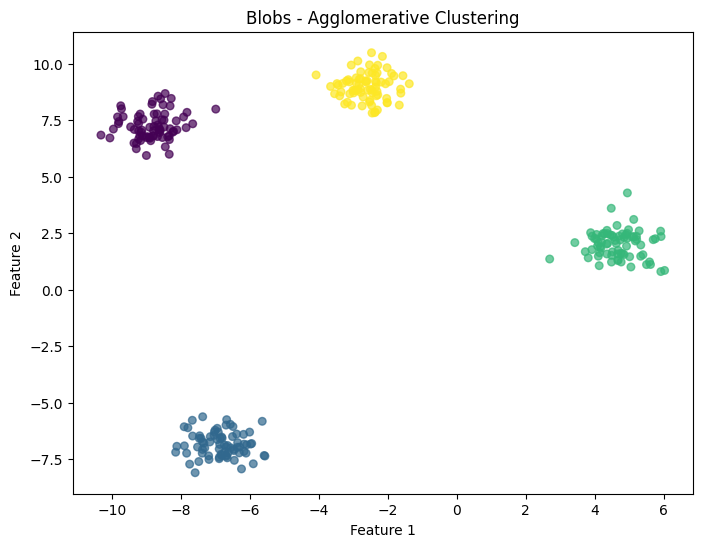


Dataset: Circles
Adjusted Rand Index (Spectral Clustering): -0.0030
Adjusted Rand Index (K-Means): -0.0034
Adjusted Rand Index (DBSCAN): 0.0000
Adjusted Rand Index (Agglomerative Clustering): 0.0013


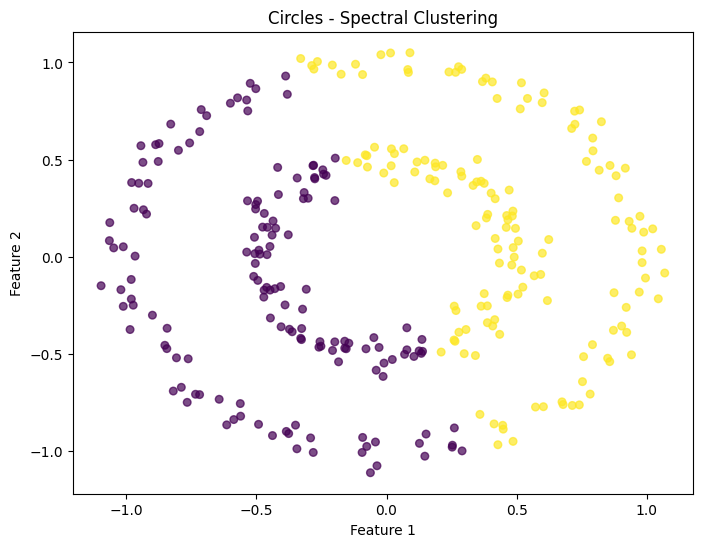

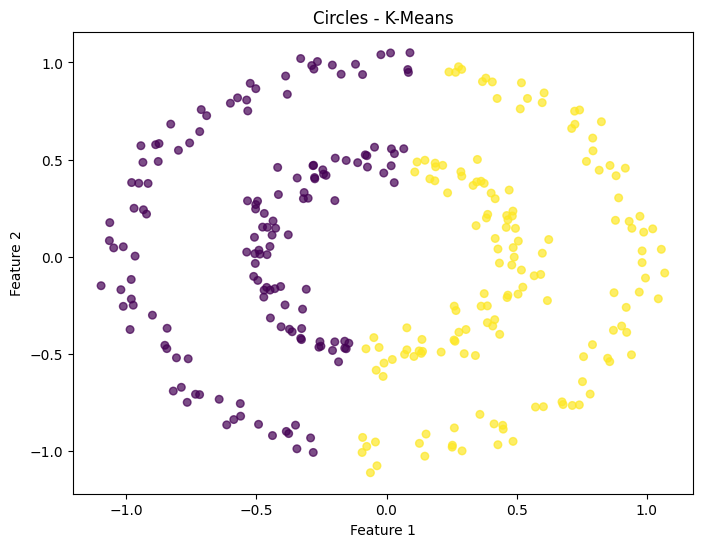

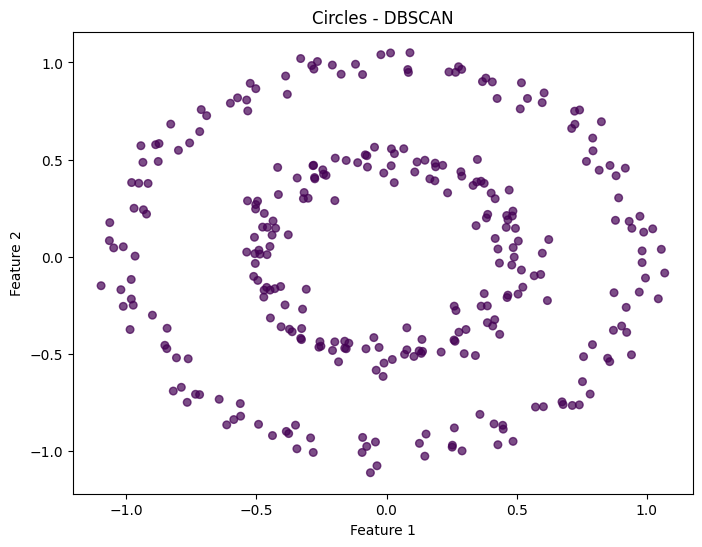

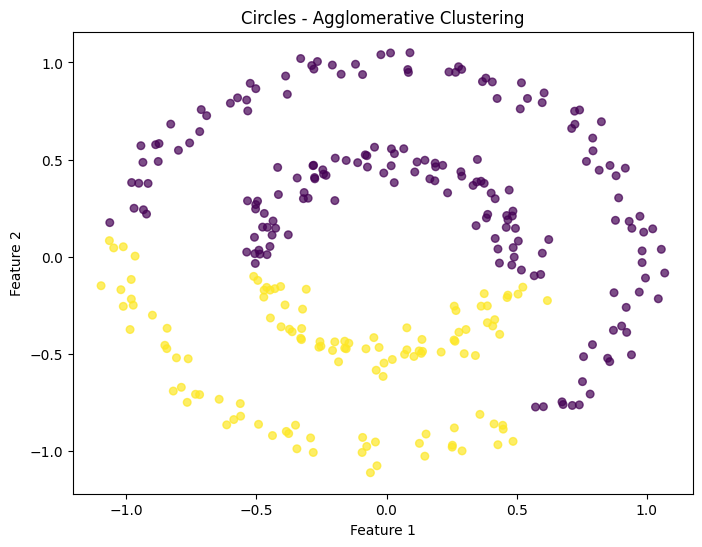

In [19]:
from sklearn.datasets import make_moons, make_blobs, make_circles

datasets = {
    'Moons': make_moons(n_samples=300, noise=0.1, random_state=42),
    'Blobs': make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42),
    'Circles': make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
}
n_clusters = {
    'Moons': 2,
    'Blobs': 4,
    'Circles': 2
}

# Function to plot clustering results
def plot_clustering_results(X, true_labels, predicted_labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=30, alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

from sklearn.metrics import adjusted_rand_score

for name, (X, y) in datasets.items():
    print(f"\nDataset: {name}")

    # Kernel-Based Spectral Clustering
    if name == 'Blobs':
        n_clusters_current = 4
    else:
        n_clusters_current = n_clusters[name]
    labels_spectral = fit_kernel_spectral_clustering(X, n_clusters=n_clusters_current, sigma=1.0)

    # Other Clustering Methods
    # 1. K-Means
    kmeans = KMeans(n_clusters=n_clusters_current, random_state=42)
    labels_kmeans = kmeans.fit_predict(X)

    # 2. DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X)

    # 3. Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters_current)
    labels_agglomerative = agglomerative.fit_predict(X)

    # Evaluation Metrics
    ari_spectral = adjusted_rand_score(y, labels_spectral)
    ari_kmeans = adjusted_rand_score(y, labels_kmeans)
    ari_dbscan = adjusted_rand_score(y, labels_dbscan)
    ari_agglomerative = adjusted_rand_score(y, labels_agglomerative)

    print(f"Adjusted Rand Index (Spectral Clustering): {ari_spectral:.4f}")
    print(f"Adjusted Rand Index (K-Means): {ari_kmeans:.4f}")
    print(f"Adjusted Rand Index (DBSCAN): {ari_dbscan:.4f}")
    print(f"Adjusted Rand Index (Agglomerative Clustering): {ari_agglomerative:.4f}")

    # Plotting Results
    plot_clustering_results(X, y, labels_spectral, f"{name} - Spectral Clustering")
    plot_clustering_results(X, y, labels_kmeans, f"{name} - K-Means")
    plot_clustering_results(X, y, labels_dbscan, f"{name} - DBSCAN")
    plot_clustering_results(X, y, labels_agglomerative, f"{name} - Agglomerative Clustering")


### Task 6.1: Comparison

Compare your clustering results, with some other clustering methods you learnt in class.

#The code is written in the previos section.

Comparison with Other Clustering Methods:

K-Means: Traditional clustering based on feature space.

DBSCAN: Density-based clustering that can identify arbitrarily shaped clusters.
Agglomerative Clustering: Hierarchical clustering that merges clusters based on distance metrics.

Evaluation: Adjusted Rand Index (ARI) is used to assess clustering performance against true labels.

In conclusion, by applying kernel-based spectral clustering, we can effectively cluster complex datasets with non-linear and non-convex decision boundaries, revealing meaningful structures in the data that may not be captured using traditional clustering methods.

The caveat is, this algorithm is sensitive to the kernel, and the gaussian kernel is highly sensitive to the hyperparameter $\sigma$.


Dataset: Moons
Tuning sigma:
Sigma: 0.10, ARI: 1.0000
Sigma: 0.20, ARI: 1.0000
Sigma: 0.30, ARI: 0.7855
Sigma: 0.40, ARI: 0.6934
Sigma: 0.50, ARI: 0.6495
Sigma: 0.60, ARI: 0.5762
Sigma: 0.70, ARI: 0.5168
Sigma: 0.80, ARI: 0.5072
Sigma: 0.90, ARI: 0.4883
Sigma: 1.00, ARI: 0.4883
Sigma: 1.10, ARI: 0.4883
Sigma: 1.20, ARI: 0.4883
Sigma: 1.30, ARI: 0.4883
Sigma: 1.40, ARI: 0.4883
Sigma: 1.50, ARI: 0.4883
Sigma: 1.60, ARI: 0.4883
Sigma: 1.70, ARI: 0.4883
Sigma: 1.80, ARI: 0.4883
Sigma: 1.90, ARI: 0.4883
Sigma: 2.00, ARI: 0.4883

Best Sigma: 0.10 with ARI: 1.0000
Adjusted Rand Index (Spectral Clustering - K-Means): 1.0000
Adjusted Rand Index (Spectral Clustering - GMM): 0.9603
Adjusted Rand Index (Spectral Clustering - Agglomerative): 0.6823


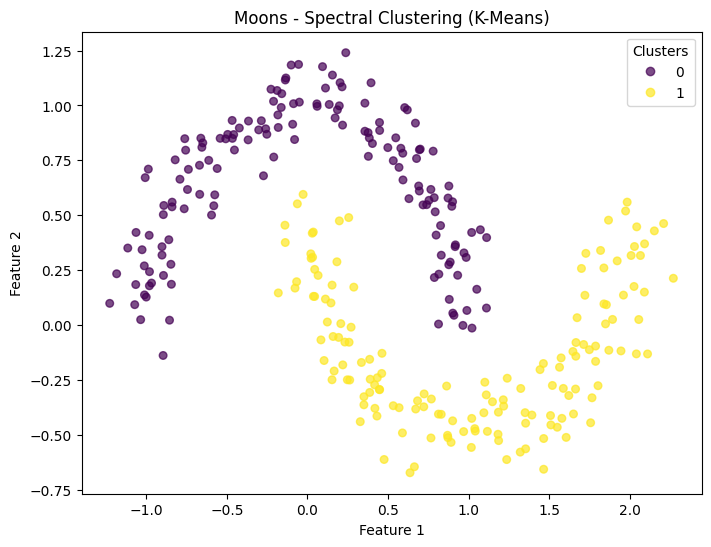

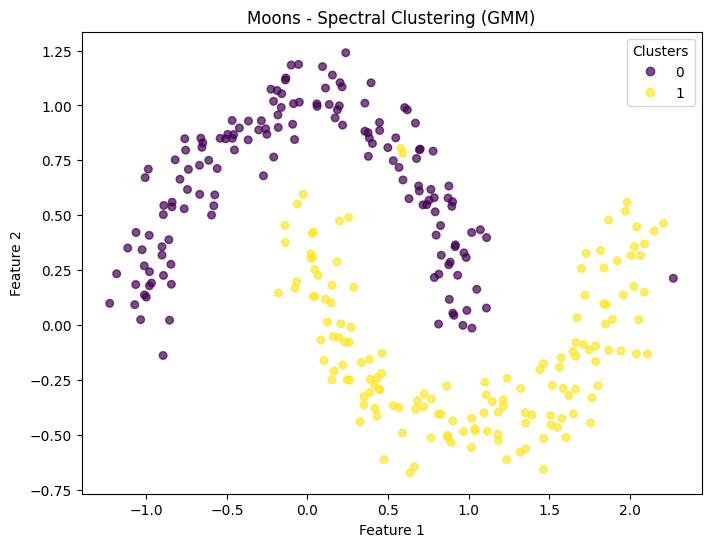

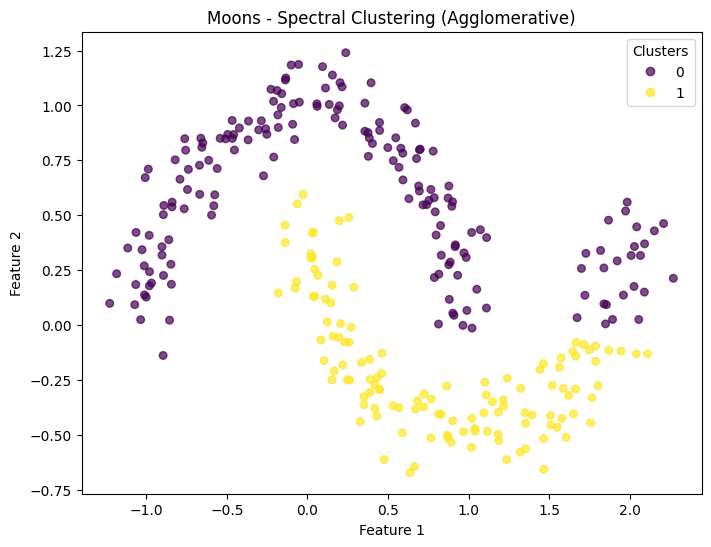


Dataset: Blobs
Tuning sigma:
Sigma: 0.10, ARI: 0.7362
Sigma: 0.20, ARI: 1.0000
Sigma: 0.30, ARI: 1.0000
Sigma: 0.40, ARI: 1.0000
Sigma: 0.50, ARI: 1.0000
Sigma: 0.60, ARI: 1.0000
Sigma: 0.70, ARI: 1.0000
Sigma: 0.80, ARI: 1.0000
Sigma: 0.90, ARI: 1.0000
Sigma: 1.00, ARI: 1.0000
Sigma: 1.10, ARI: 1.0000
Sigma: 1.20, ARI: 1.0000
Sigma: 1.30, ARI: 1.0000
Sigma: 1.40, ARI: 1.0000
Sigma: 1.50, ARI: 1.0000
Sigma: 1.60, ARI: 1.0000
Sigma: 1.70, ARI: 1.0000
Sigma: 1.80, ARI: 1.0000
Sigma: 1.90, ARI: 1.0000
Sigma: 2.00, ARI: 1.0000

Best Sigma: 0.20 with ARI: 1.0000
Adjusted Rand Index (Spectral Clustering - K-Means): 1.0000
Adjusted Rand Index (Spectral Clustering - GMM): 1.0000
Adjusted Rand Index (Spectral Clustering - Agglomerative): 0.6426


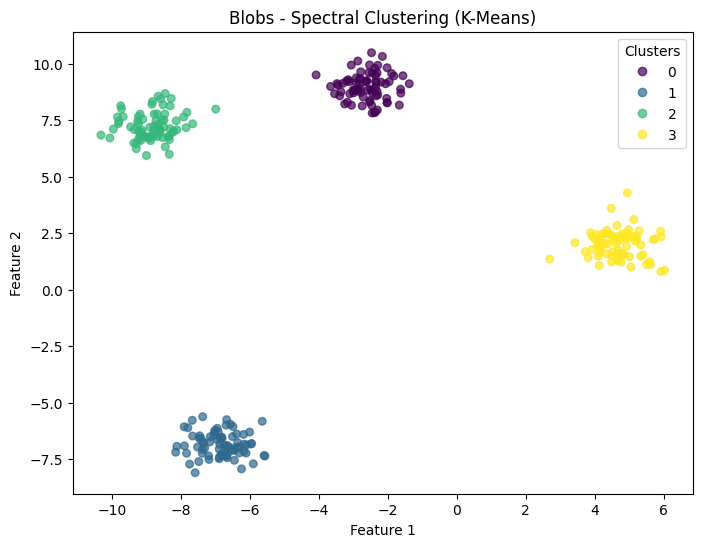

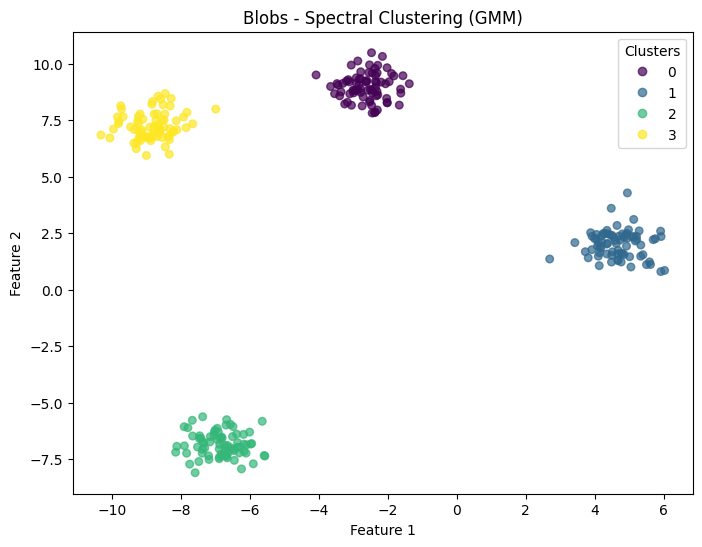

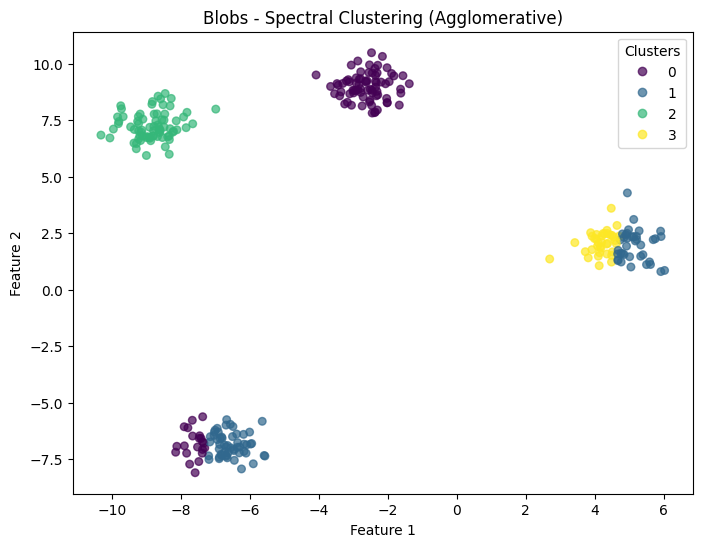


Dataset: Circles
Tuning sigma:
Sigma: 0.10, ARI: 1.0000
Sigma: 0.20, ARI: 1.0000
Sigma: 0.30, ARI: -0.0032
Sigma: 0.40, ARI: -0.0026
Sigma: 0.50, ARI: -0.0026
Sigma: 0.60, ARI: -0.0026
Sigma: 0.70, ARI: -0.0030
Sigma: 0.80, ARI: -0.0030
Sigma: 0.90, ARI: -0.0030
Sigma: 1.00, ARI: -0.0030
Sigma: 1.10, ARI: -0.0030
Sigma: 1.20, ARI: -0.0030
Sigma: 1.30, ARI: -0.0030
Sigma: 1.40, ARI: -0.0030
Sigma: 1.50, ARI: -0.0030
Sigma: 1.60, ARI: -0.0030
Sigma: 1.70, ARI: -0.0030
Sigma: 1.80, ARI: -0.0030
Sigma: 1.90, ARI: -0.0030
Sigma: 2.00, ARI: -0.0030

Best Sigma: 0.10 with ARI: 1.0000
Adjusted Rand Index (Spectral Clustering - K-Means): 1.0000
Adjusted Rand Index (Spectral Clustering - GMM): 0.1139
Adjusted Rand Index (Spectral Clustering - Agglomerative): 0.1327


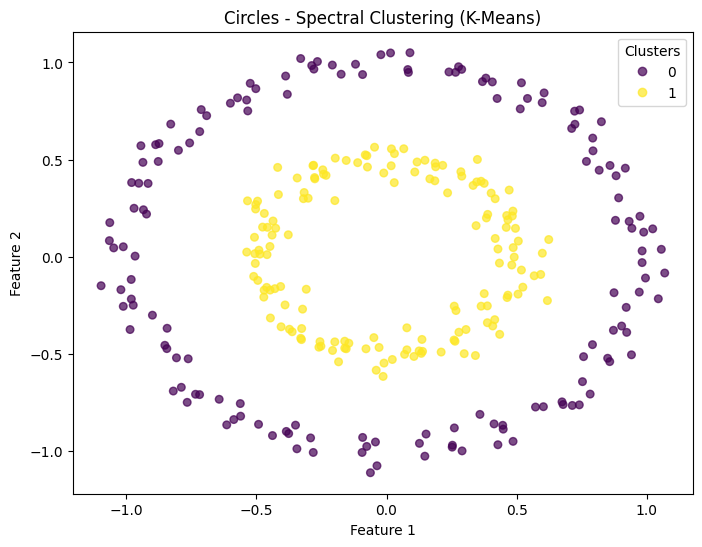

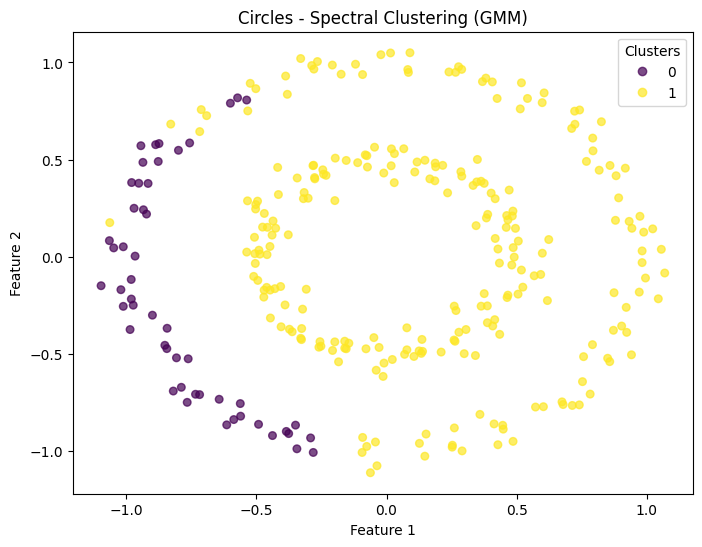

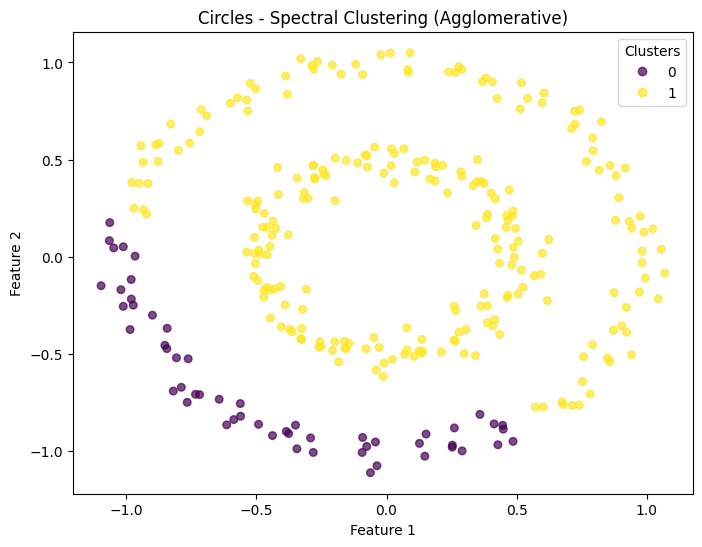

In [26]:
# Task 6: Kernel-Based Spectral Clustering with Enhanced Performance
from sklearn.mixture import GaussianMixture
def fit_kernel_spectral_clustering(X, n_clusters=3, sigma=1.0):

    # Step 1: Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Compute the Gaussian (RBF) kernel matrix
    K = rbf_kernel(X_scaled, gamma=1.0/(2*sigma**2))

    # Step 3: Compute the normalized Laplacian
    degrees = np.sum(K, axis=1)
    D_inv_sqrt = np.diag(1.0 / np.sqrt(degrees))
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0  # Replace infinities with zeros
    L_norm = np.identity(K.shape[0]) - D_inv_sqrt @ K @ D_inv_sqrt

    # Step 4: Perform eigenvalue decomposition
    eigenvalues, eigenvectors = la.eigh(L_norm)

    # Step 5: Select the first 'n_clusters' non-trivial eigenvectors
    spectral_embedding = eigenvectors[:, 1:n_clusters + 1]

    # Step 6: Normalize rows to have unit length
    spectral_embedding = spectral_embedding / np.linalg.norm(spectral_embedding, axis=1, keepdims=True)

    # Step 7: Apply K-Means to the spectral embedding
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(spectral_embedding)

    return labels

def tune_sigma(X, y, sigma_values, n_clusters):

    best_sigma = None
    best_ari = -1
    for sigma in sigma_values:
        labels = fit_kernel_spectral_clustering(X, n_clusters=n_clusters, sigma=sigma)
        ari = adjusted_rand_score(y, labels)
        print(f"Sigma: {sigma:.2f}, ARI: {ari:.4f}")
        if ari > best_ari:
            best_ari = ari
            best_sigma = sigma
    print(f"\nBest Sigma: {best_sigma:.2f} with ARI: {best_ari:.4f}")
    return best_sigma

def cluster_with_advanced_methods(embedding, n_clusters):

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels_gmm = gmm.fit_predict(embedding)

    # Agglomerative Clustering
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agglom = agglom.fit_predict(embedding)

    return labels_gmm, labels_agglom

def visualize_embedding(X, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

# Example usage of Task 6
if __name__ == "__main__":
    # Define datasets
    datasets = {
        'Moons': make_moons(n_samples=300, noise=0.1, random_state=42),
        'Blobs': make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42),
        'Circles': make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
    }
    n_clusters_dict = {
        'Moons': 2,
        'Blobs': 4,
        'Circles': 2
    }

    for name, (X, y) in datasets.items():
        print(f"\nDataset: {name}")

        # Tune sigma
        sigma_range = np.linspace(0.1, 2.0, 20)
        print("Tuning sigma:")
        best_sigma = tune_sigma(X, y, sigma_range, n_clusters=n_clusters_dict[name])

        # Perform kernel-based spectral clustering with best sigma
        labels_spectral = fit_kernel_spectral_clustering(X, n_clusters=n_clusters_dict[name], sigma=best_sigma)

        # Advanced Clustering Methods on Spectral Embedding
        # Recompute spectral embedding
        spectral_embedding = spectral_embedding_enhanced(X, n_clusters=n_clusters_dict[name], sigma=best_sigma, additional_dims=1)

        # Cluster using GMM and Agglomerative Clustering
        labels_gmm, labels_agglom = cluster_with_advanced_methods(spectral_embedding, n_clusters=n_clusters_dict[name])

        # Evaluate Clustering
        ari_spectral = adjusted_rand_score(y, labels_spectral)
        ari_gmm = adjusted_rand_score(y, labels_gmm)
        ari_agglom = adjusted_rand_score(y, labels_agglom)

        print(f"Adjusted Rand Index (Spectral Clustering - K-Means): {ari_spectral:.4f}")
        print(f"Adjusted Rand Index (Spectral Clustering - GMM): {ari_gmm:.4f}")
        print(f"Adjusted Rand Index (Spectral Clustering - Agglomerative): {ari_agglom:.4f}")

        # Visualization
        visualize_embedding(X, labels_spectral, f"{name} - Spectral Clustering (K-Means)")
        visualize_embedding(X, labels_gmm, f"{name} - Spectral Clustering (GMM)")
        visualize_embedding(X, labels_agglom, f"{name} - Spectral Clustering (Agglomerative)")
